# Visualisation Tools for Screening
### Version 0.3.0
#### Demo Project

This demo provides an example of using the *vis_tools_screening* package. 

It will cover:
1. Datasets - uploading built in ones or new ones
2. Basic statistical graphs and possible customisations
3. More advanced visualisations, including:
* Interactive bar charts
* Choropleth maps

In [3]:
# Ignore warnings for purposes of demo notebook
import warnings
warnings.filterwarnings('ignore')

### Datasets

This package features functions which take the raw data from a CSV file as input, and performs several steps to prepare it for analysis. The functions are held in the module datasets.py. The functions carry out tasks including missing data handling and removing irrelevant rows or columns.
Using this function to read in the data ensures that it is clean and prepared for visualisation steps.

There are three functions available: load_cerv(), load_bowel() and load_breast(). Each function is tailored to the data cleaning and preprocessing of the three major screening programmes in the UK respectively: cervical, bowel and breast cancer.

Import one of the built-in training datasets:

In [4]:
# Import function to load the cleaned cervical cancer DataFrame from a local file into the notebook
import datasets as ds
# Run function
df = ds.load_cerv()

The package also has functionality for importing a custom dataset, using the load_custom() function. Please place your own dataset into the 'data' folder.

If you are using your own dataset. Ensure its columns include:
* 'Area Code', eg. 'E12000001'
* 'Area Name', eg. 'Exeter'
* 'Area Type', eg. 'LA'
* 'Time period', eg. 2010
* 'Value', eg. '77.5379545'
* 'Age', eg. '25-64 yrs'
* 'Sex', eg. 'Female'

### Basic Data Exploration

 
The datatypes of the columns in the DataFrame are:            
Area Code          object
Area Name          object
Area Type          object
Sex                object
Age                object
Category Type      object
Category           object
Time period         int64
Value             float64
Lower CI limit    float64
Upper CI limit    float64
Count               int64
Denominator         int64
Value note         object
dtype: object
 
The number of null values in each column are:            
Area Code            0
Area Name            0
Area Type            0
Sex                  0
Age                  0
Category Type     2653
Category             0
Time period          0
Value                0
Lower CI limit     292
Upper CI limit     292
Count                0
Denominator          0
Value note        2641
dtype: int64
The number of duplicated rows are:             0
Below is a barplot of Area Type frequencies:


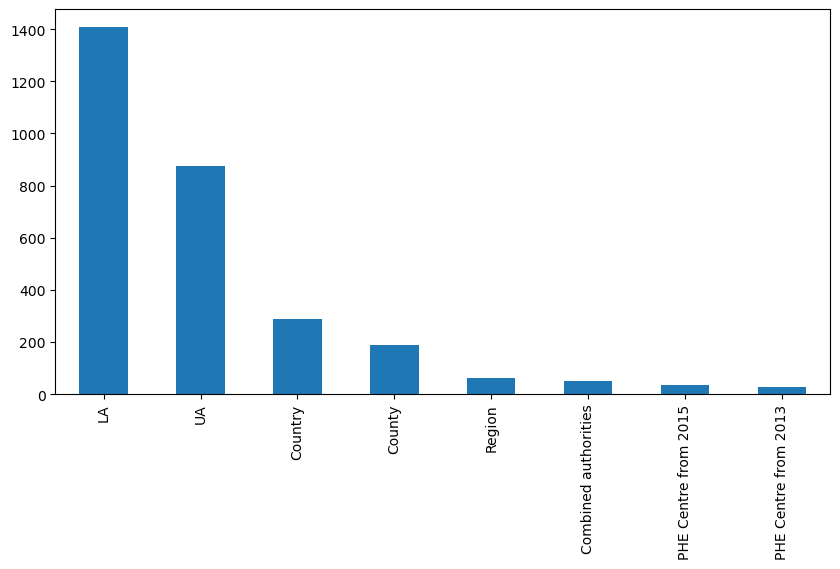

Below is a histogram of the float columns:


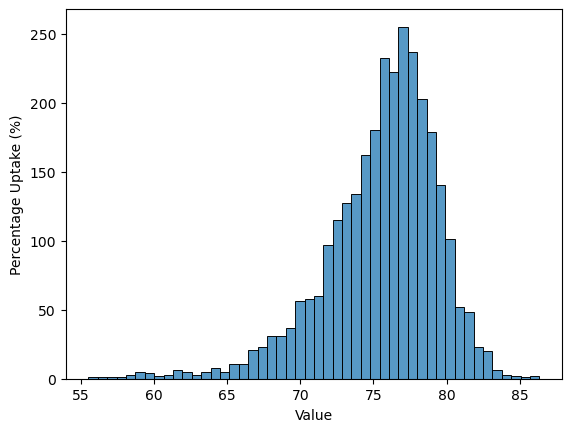

Below is a barplot overview of the area names and frequencies:


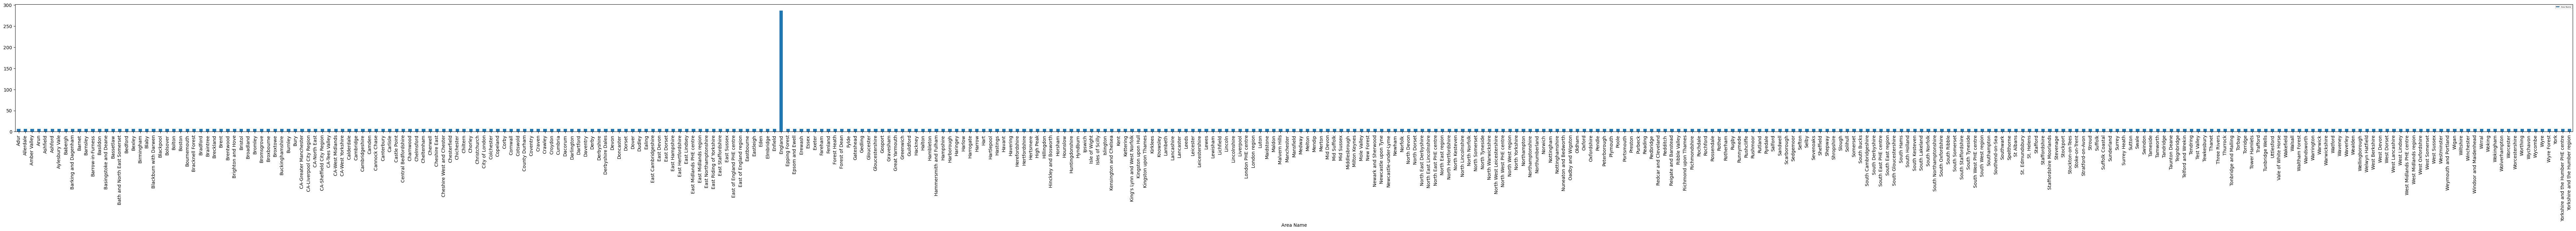

<Figure size 1920x1440 with 0 Axes>

Below are boxplots of the Value column in the dataframe, grouped by Area Type:


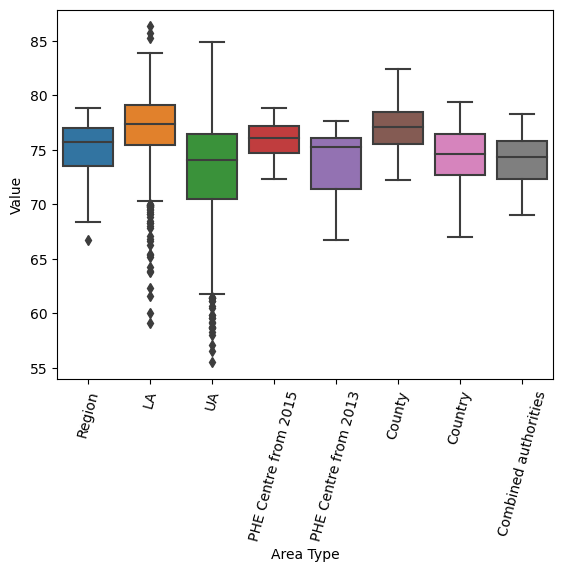

Below are multiple boxplots of the Value column         in the dataframe, grouped by Area Type LA, UA and Region:


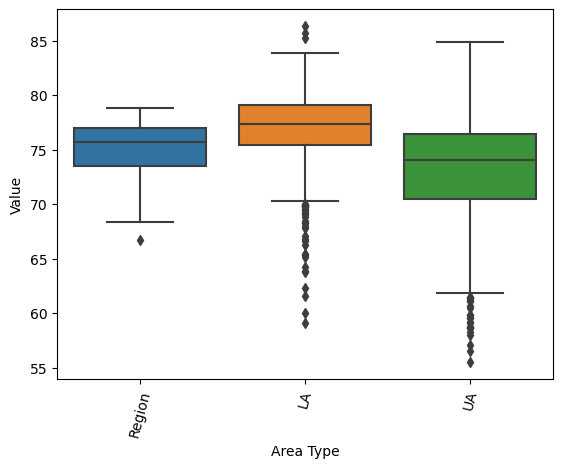

In [5]:
cerv_explore = ds.BasicDataExploration(df)
cerv_explore.explore()

### Basic Statistical Graphs
Basic graph tools are within the baseline.py module. Once the DataFrame has been loaded and cleaned, basic statistical descriptive graphs may be plotted. In this example, we will plot a histogram of the screening percentage uptake data (the 'Value' column) and the number of datapoints in the dataset on the right.

Keep in mind that this is not appropriate for extensive statistical analysis at this stage, as the datapoints being plotted vary in what geographical unit the uptake percentage is being measured from. 

In [6]:
# Import basline module
from baseline import *

#### Histogram 
Can choose the numeric column in the dataset to plot. 
Change the parameters of the graph.
If you would like to learn more about the function run: help(histogram).

In [7]:
help(histogram)

Help on function histogram in module baseline:

histogram(df, col, title='Plot', x_label='X', y_label='Y', fontsize=12, include_leg=False, figsize=(8, 5))
    Plots an customised histogram.
    Parameters:
    ----------
    df: pandas DataFrame
        dataframe containing the column user wishes to plot
    col: str
        name of the column to be plotted
    title: str
        the title of the plot, default="Plot"
    x_label: str
        name of X axis on the plot, default="X"
    y_label: str
        name of the Y axis on the plot, default="Y"
    fontsize: int
        size of the font, default=12
    include_leg: bool
        if True includes legend, default=True
    figsize: touple
        size of the figure in inches (width, height), default=(8,5)



A basic histogram plot of the data: 


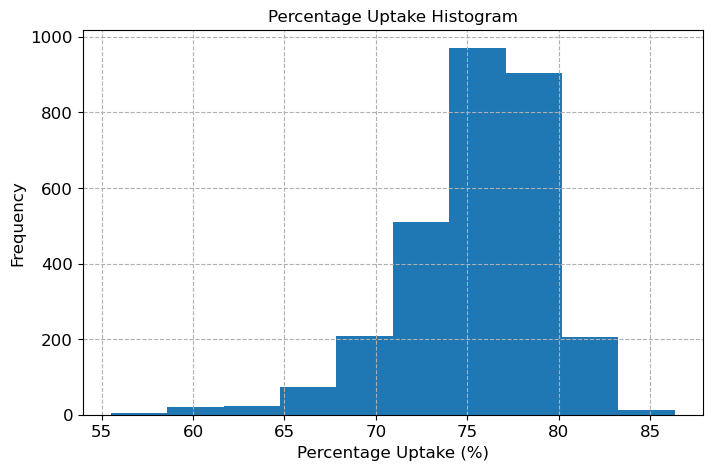

In [8]:
print('A basic histogram plot of the data: ')
histogram(df, col='Value', title='Percentage Uptake Histogram', x_label='Percentage Uptake (%)', y_label='Frequency')

#### Line plot
In this next example, we will view the percentage uptake over time for three areas: Exeter, Mid Sussex and Horsham, and compare them using a lineplot.
This function can also be used to view the data for on only one area.

A basic line plot of the data: 
Exeter
Mid Sussex
Horsham


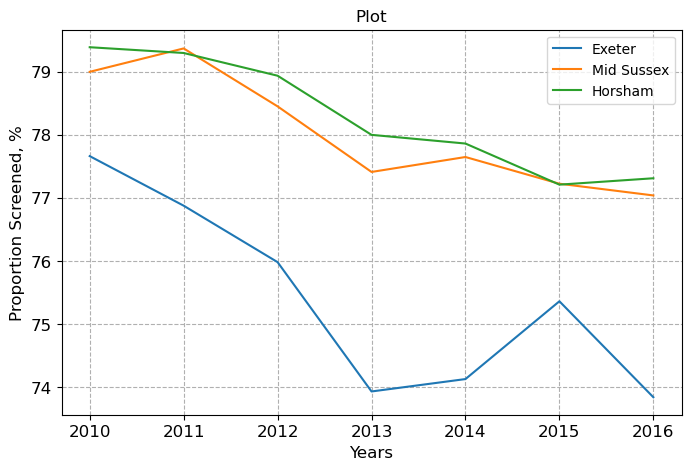

In [9]:
print('A basic line plot of the data: ')
linear_comp(df, area_list=['Exeter', 'Mid Sussex', 'Horsham'])

### Advanced visualisations
In the next part of this demo project, we will use three advanced visualisations to explain the functionalities of a python package built to visualise screening uptake data: a London and Regional UK choropleth map, an animated rank-based graph and a country-wide analysis plot. 

In [10]:
# Import tools for advanced visualisations
import plotly.io as pio
pio.renderers.default = "vscode"
from visualisation import *

#### London Choropleth

Our London and Regional UK choropleth map will allow us to quickly and easily visualise the data on a geographical basis. Colour-coded regions will indicate the relative uptake levels of the screening across the country, making it easy to spot trends and areas of higher or lower uptake.

In [11]:
# Plot a map of London and mean uptake across all years
ldn_map = LondonMap(df)
ldn_map.val_labels = True
ldn_map.plot_london_map()

<Figure size 2000x1000 with 0 Axes>

KeyboardInterrupt: 

#### UK regions Choropleth

In [ ]:
# Plot a Choropleth map of UK regions
region_map = Region_Analysis(in_year=2011)

#### Deprivation Status Graphs

In [4]:
from deprivation import *

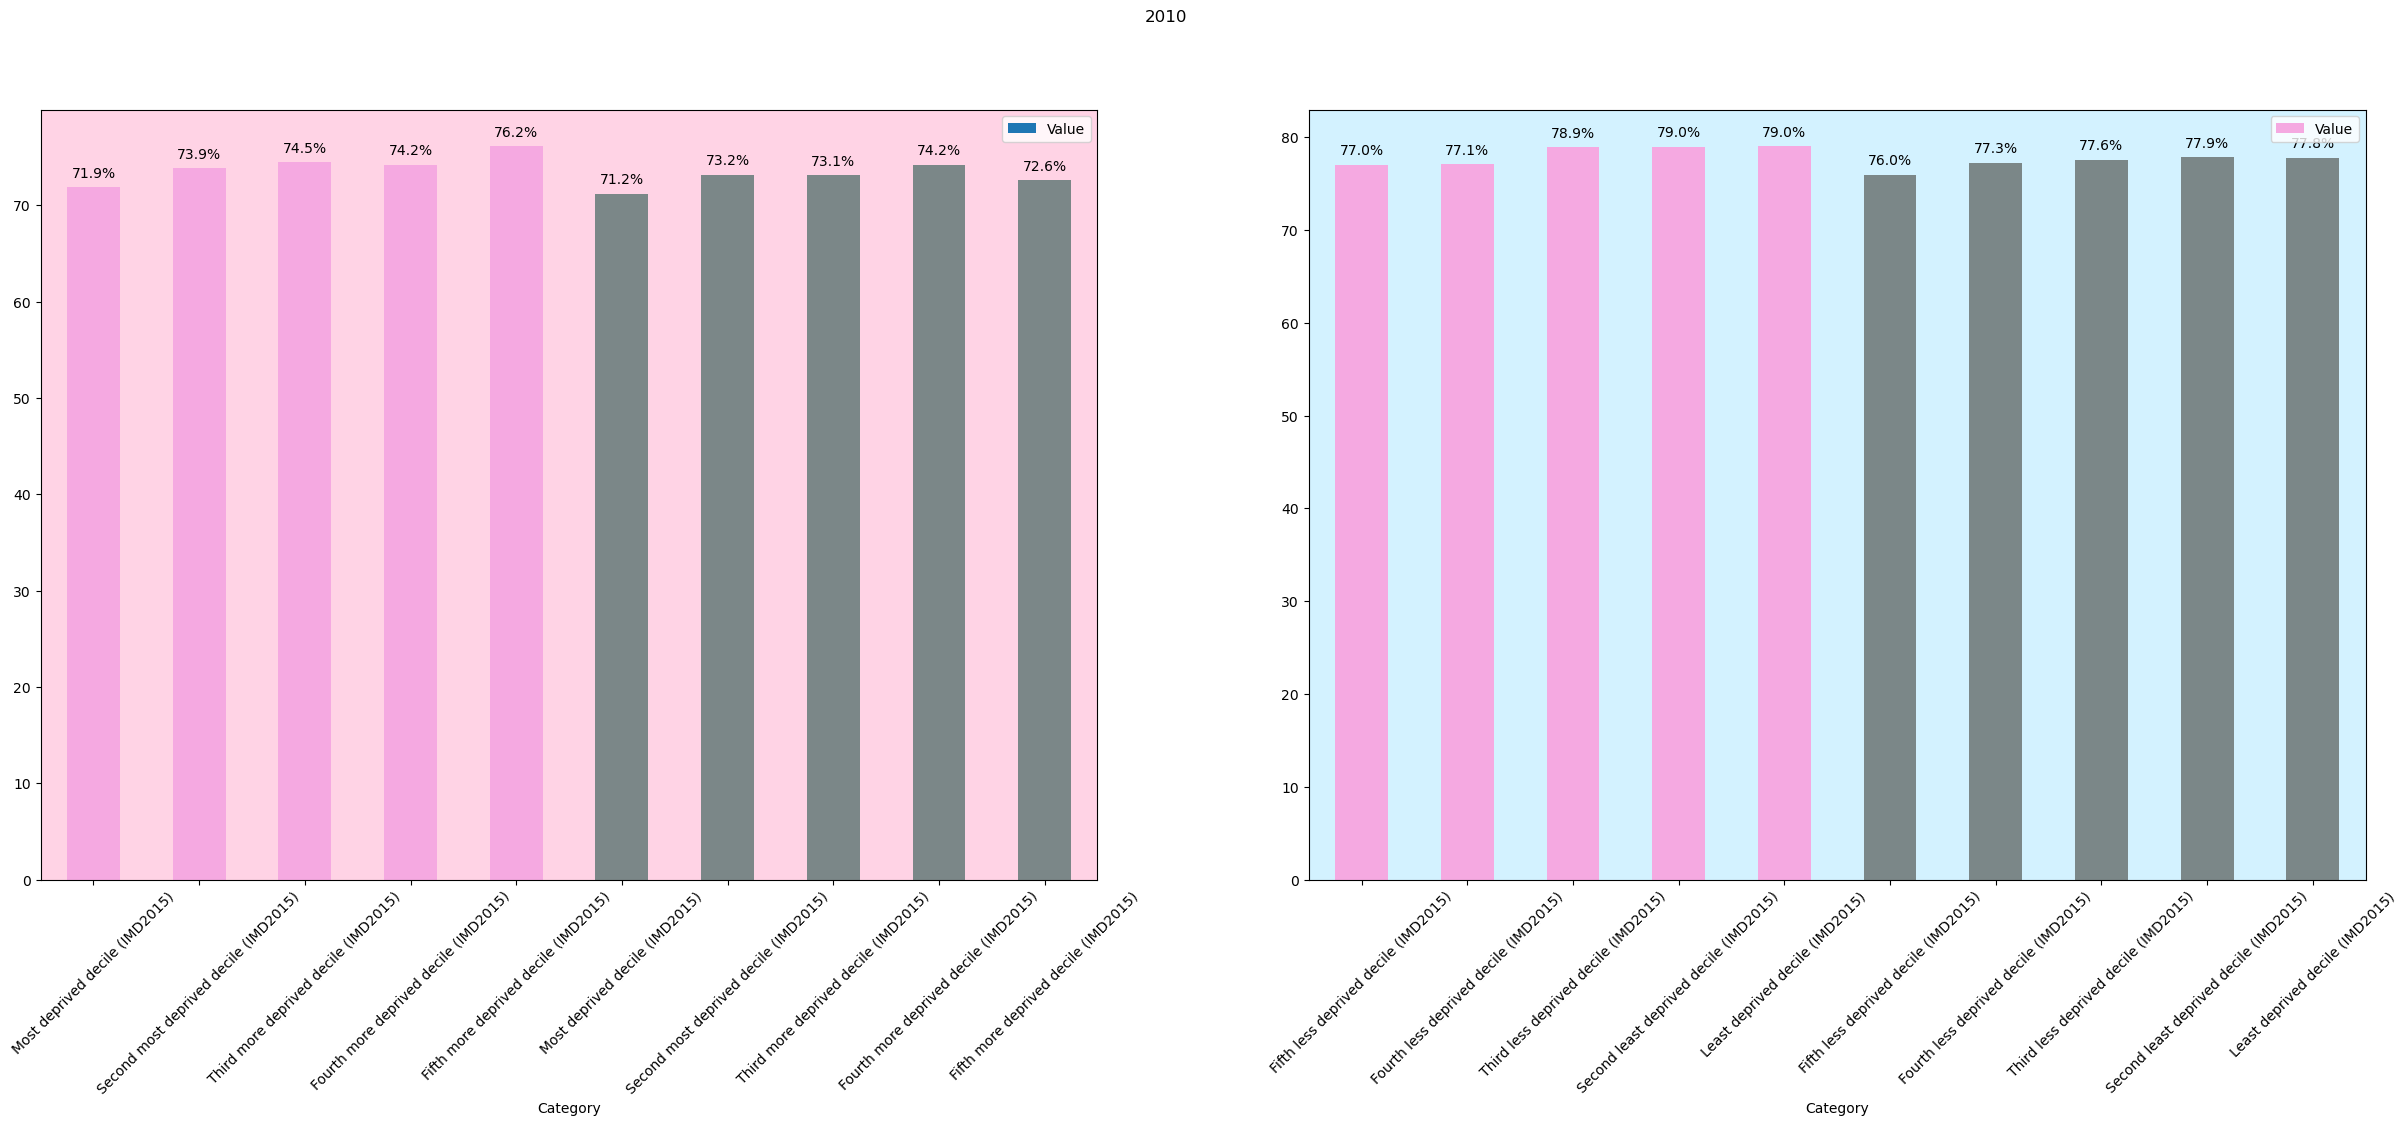

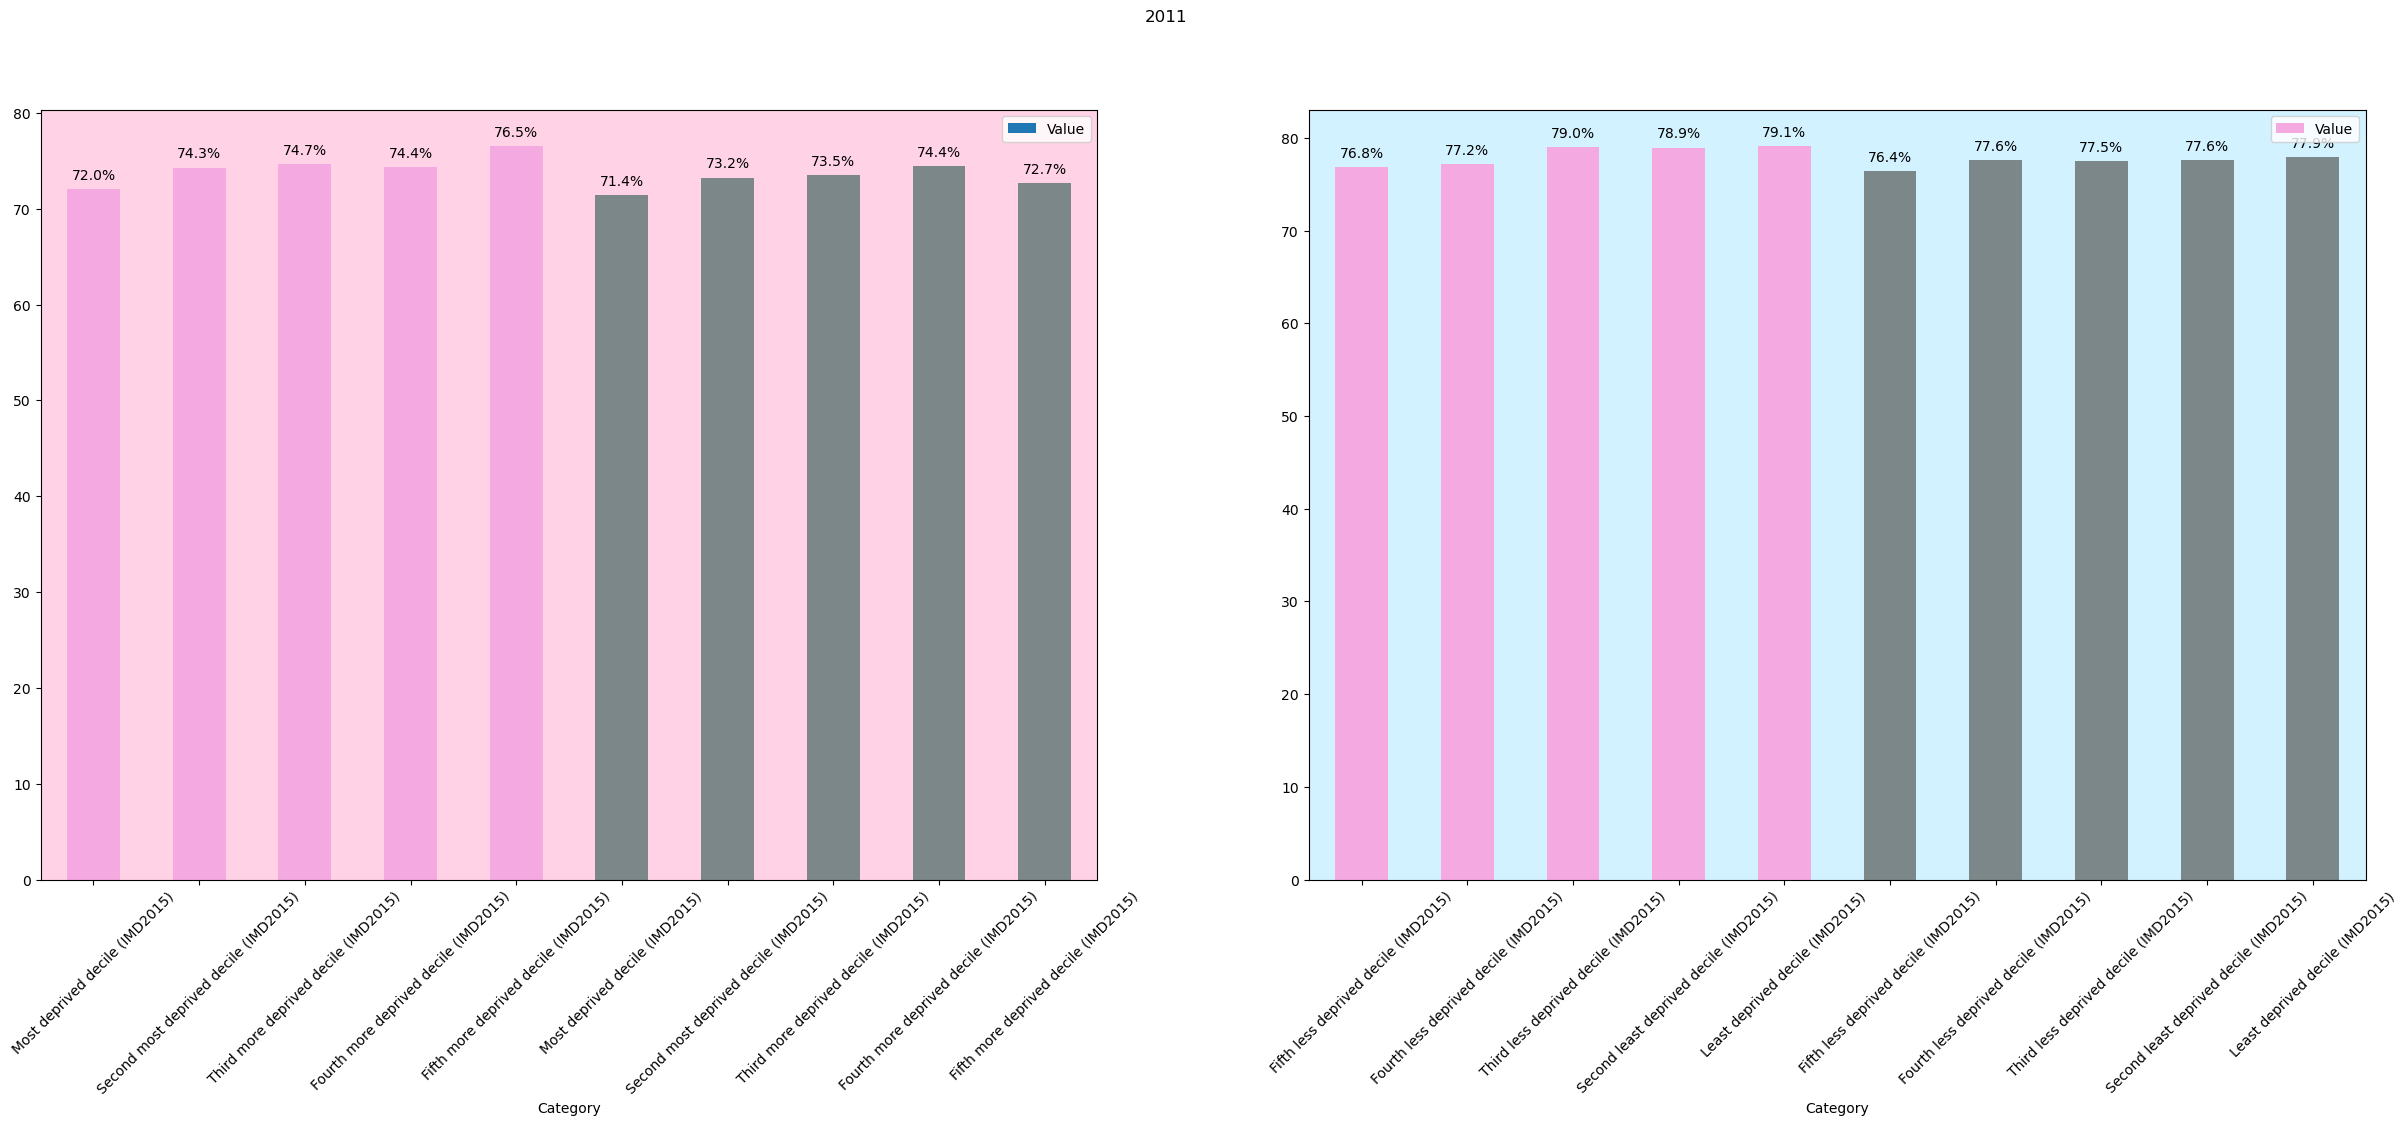

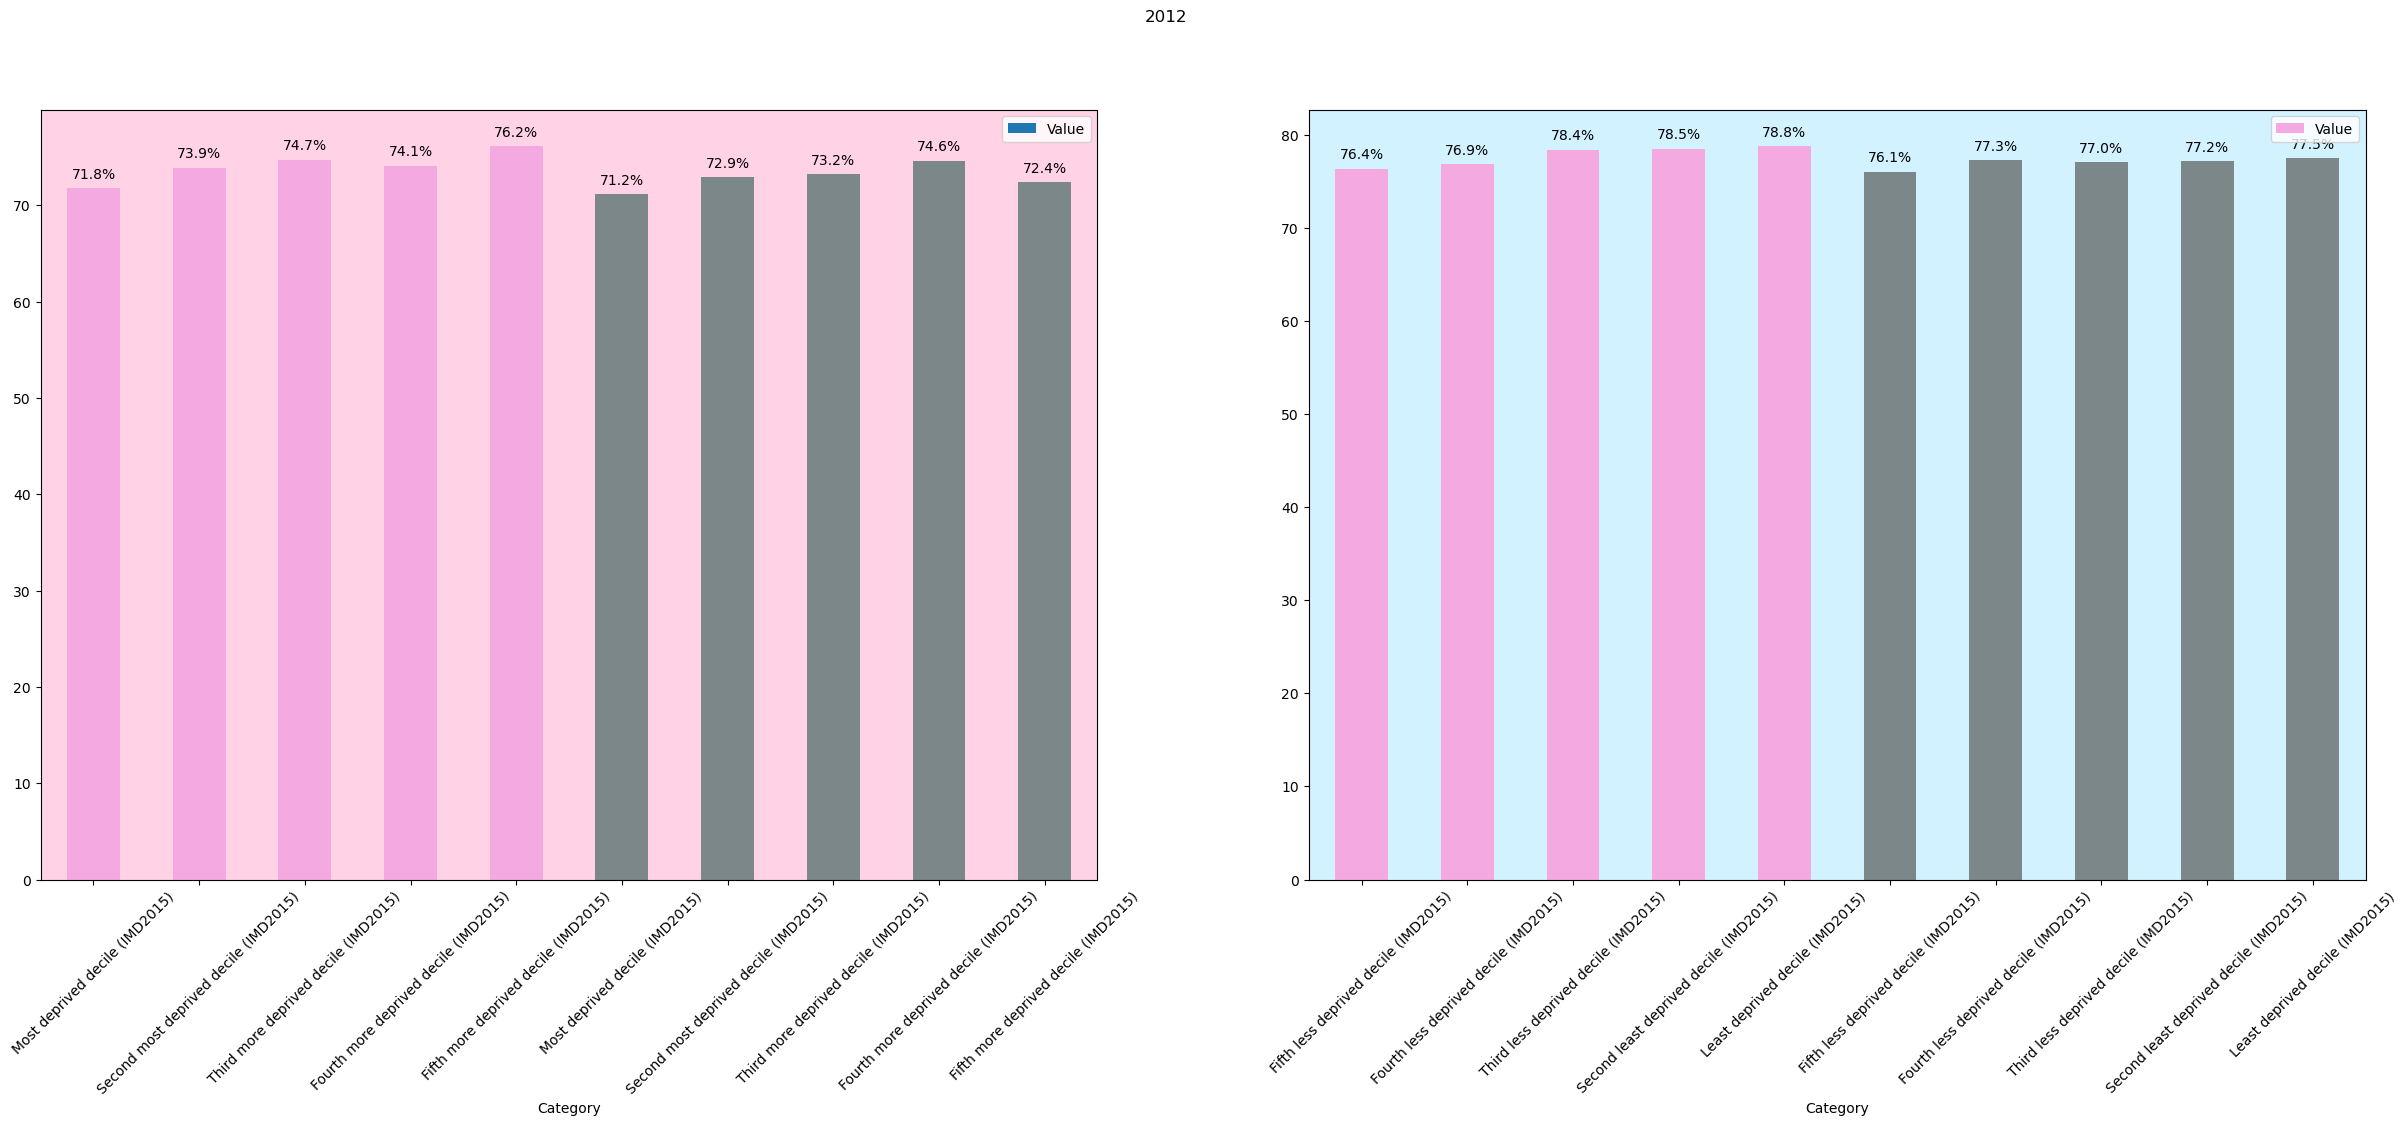

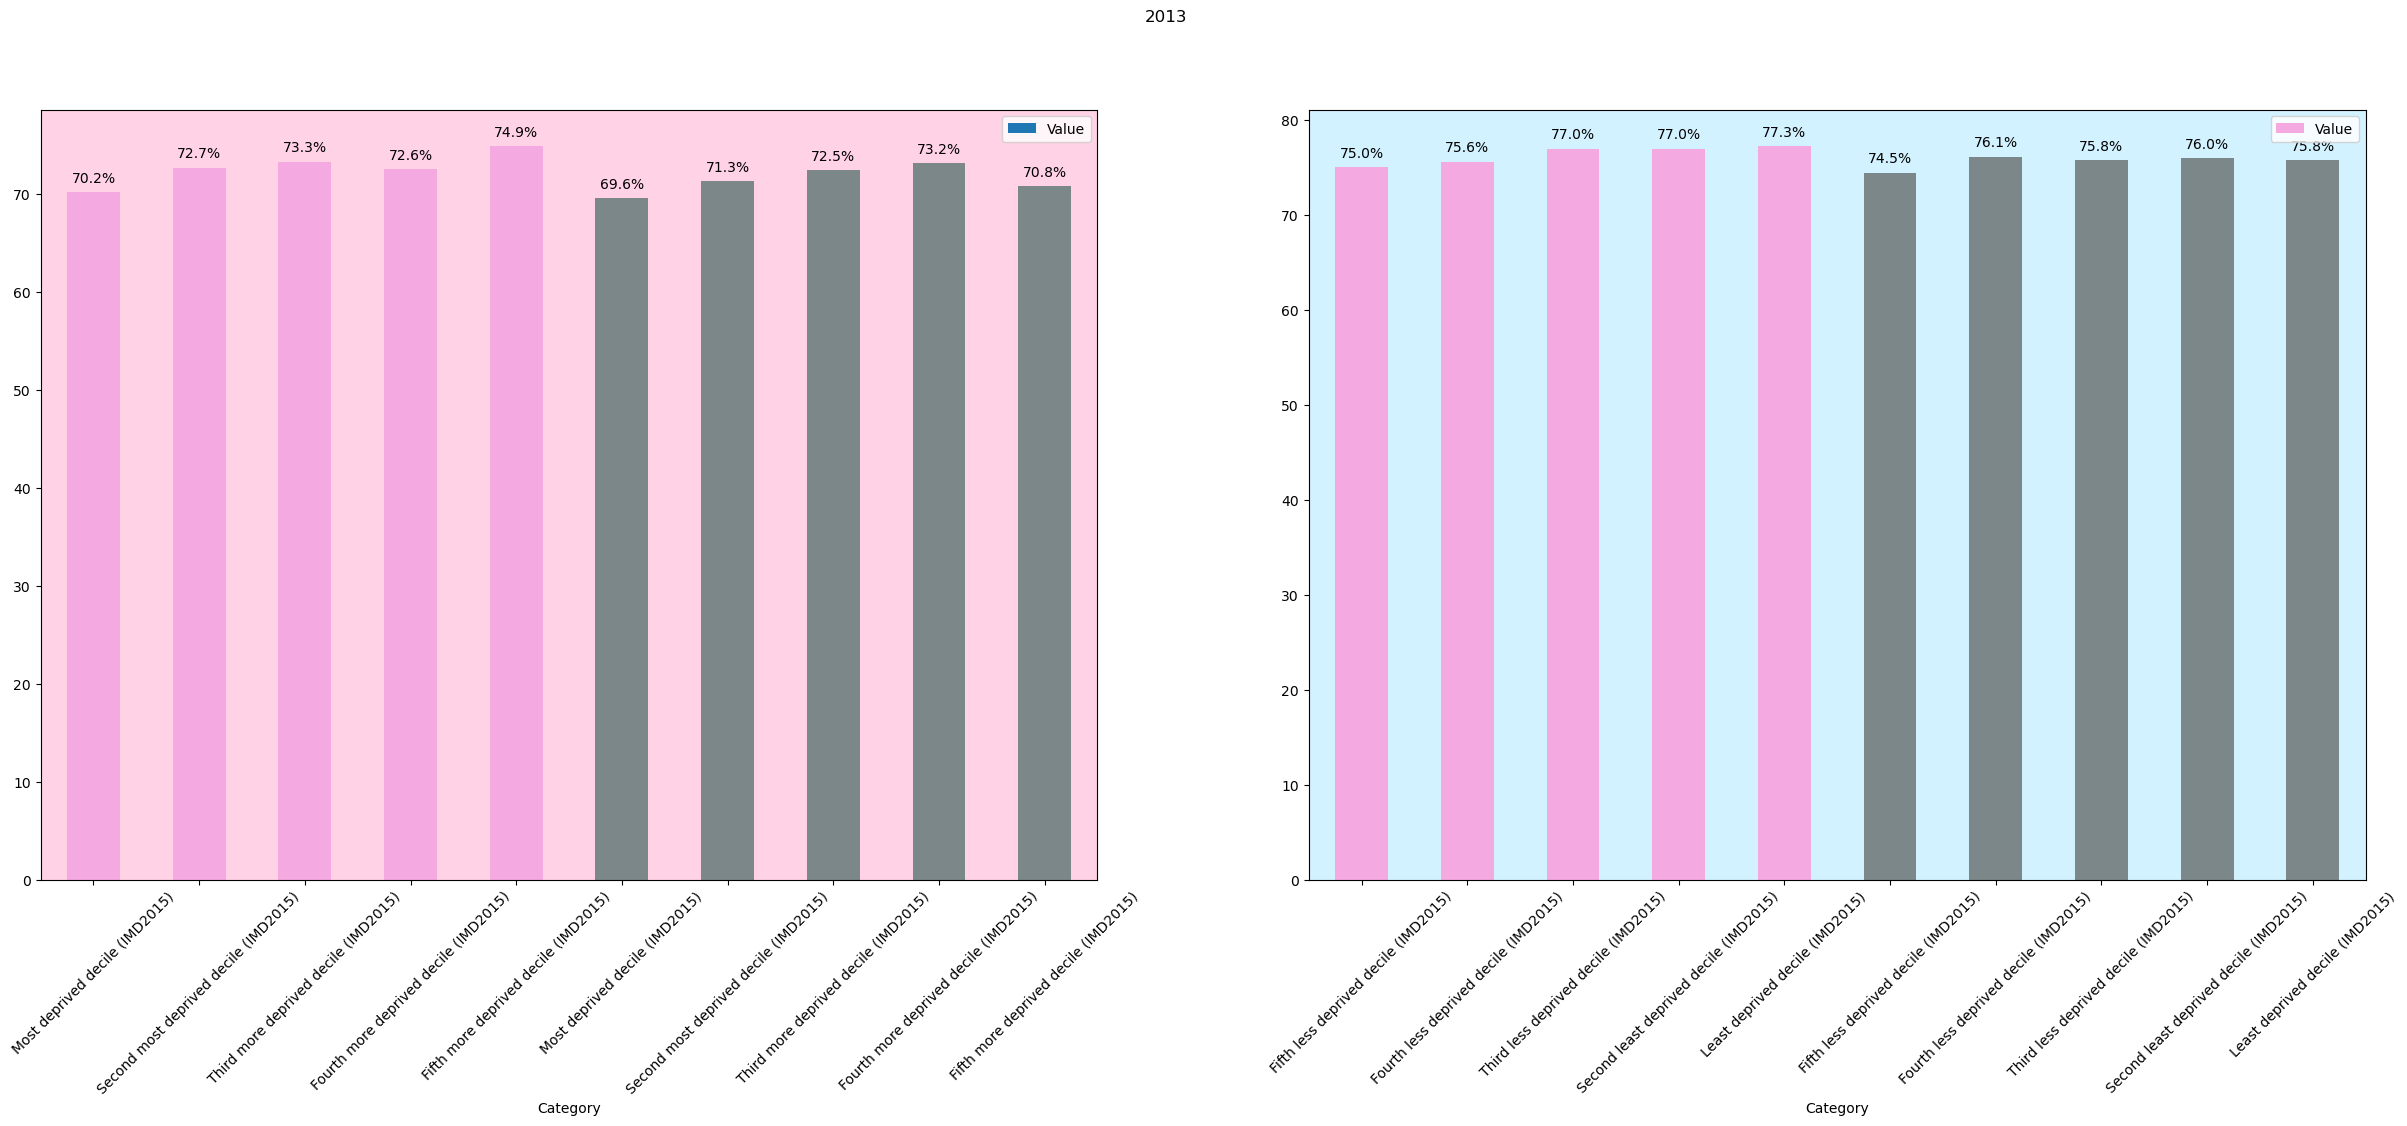

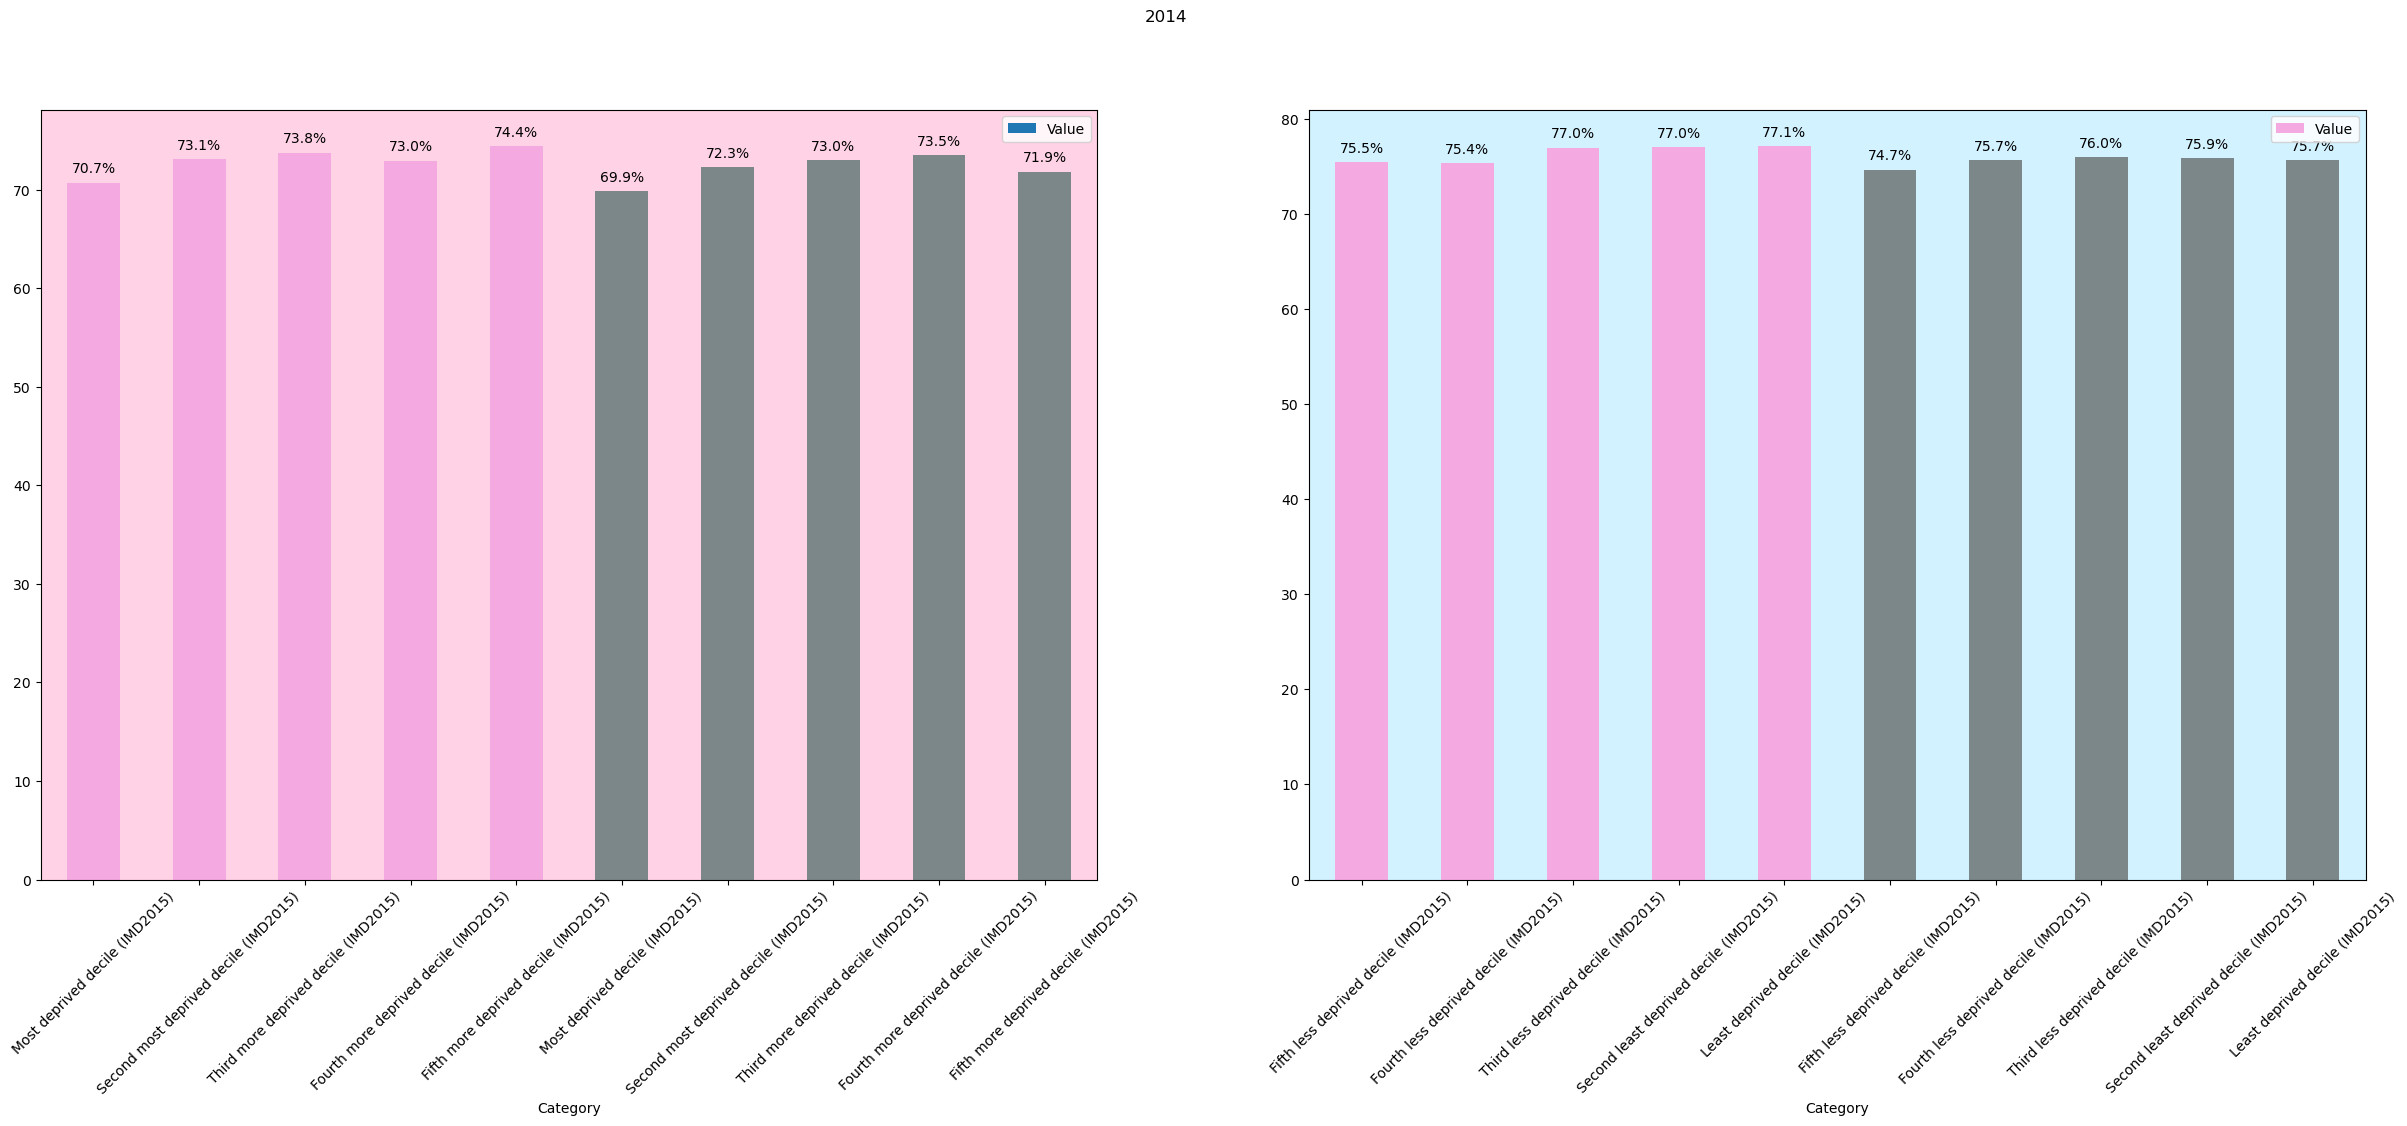

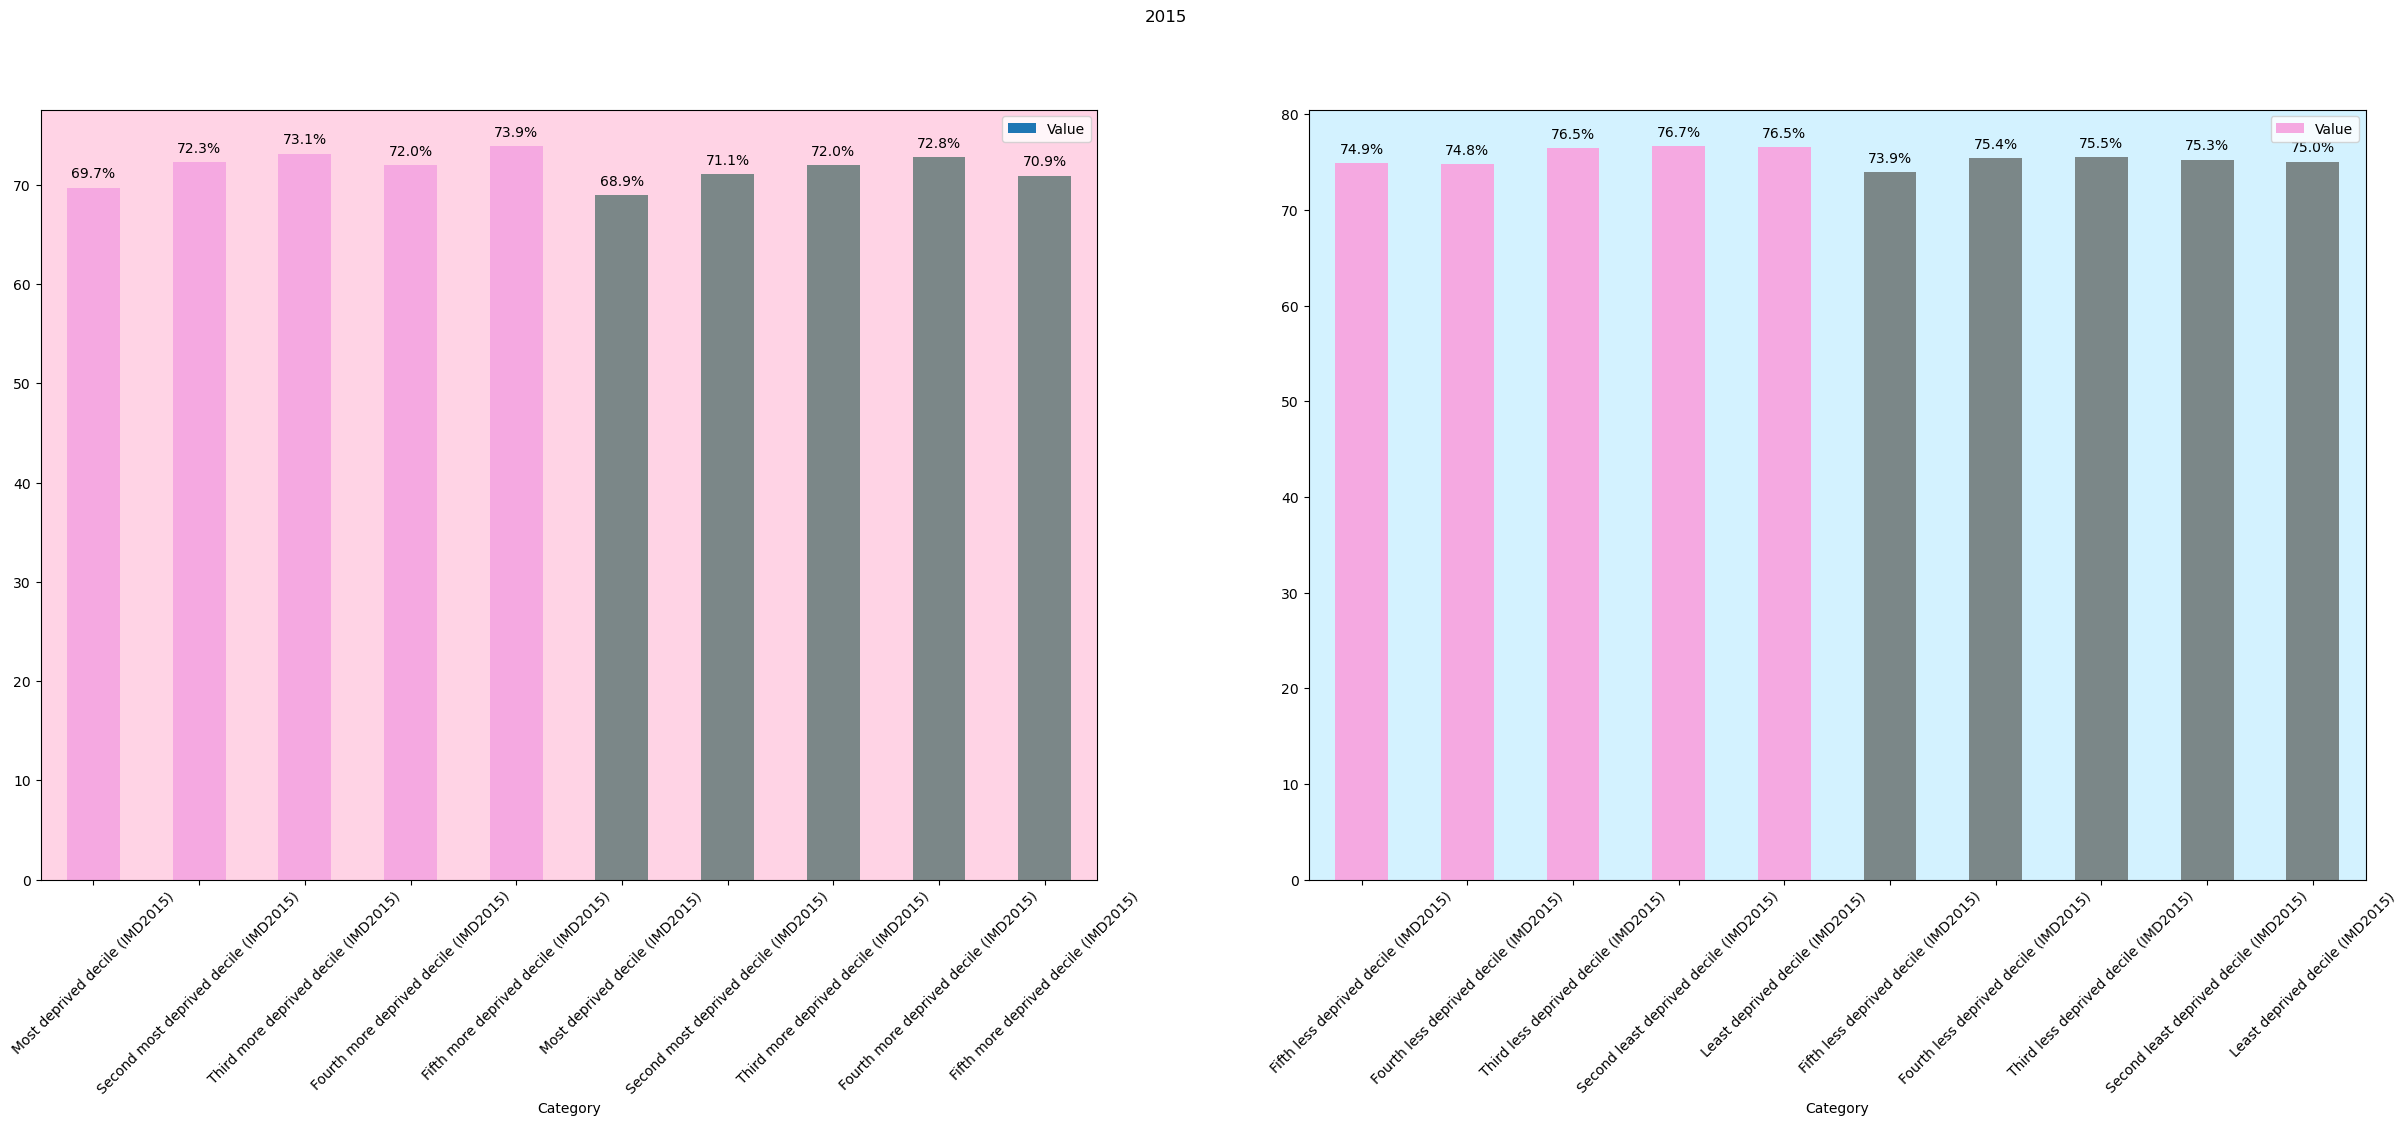

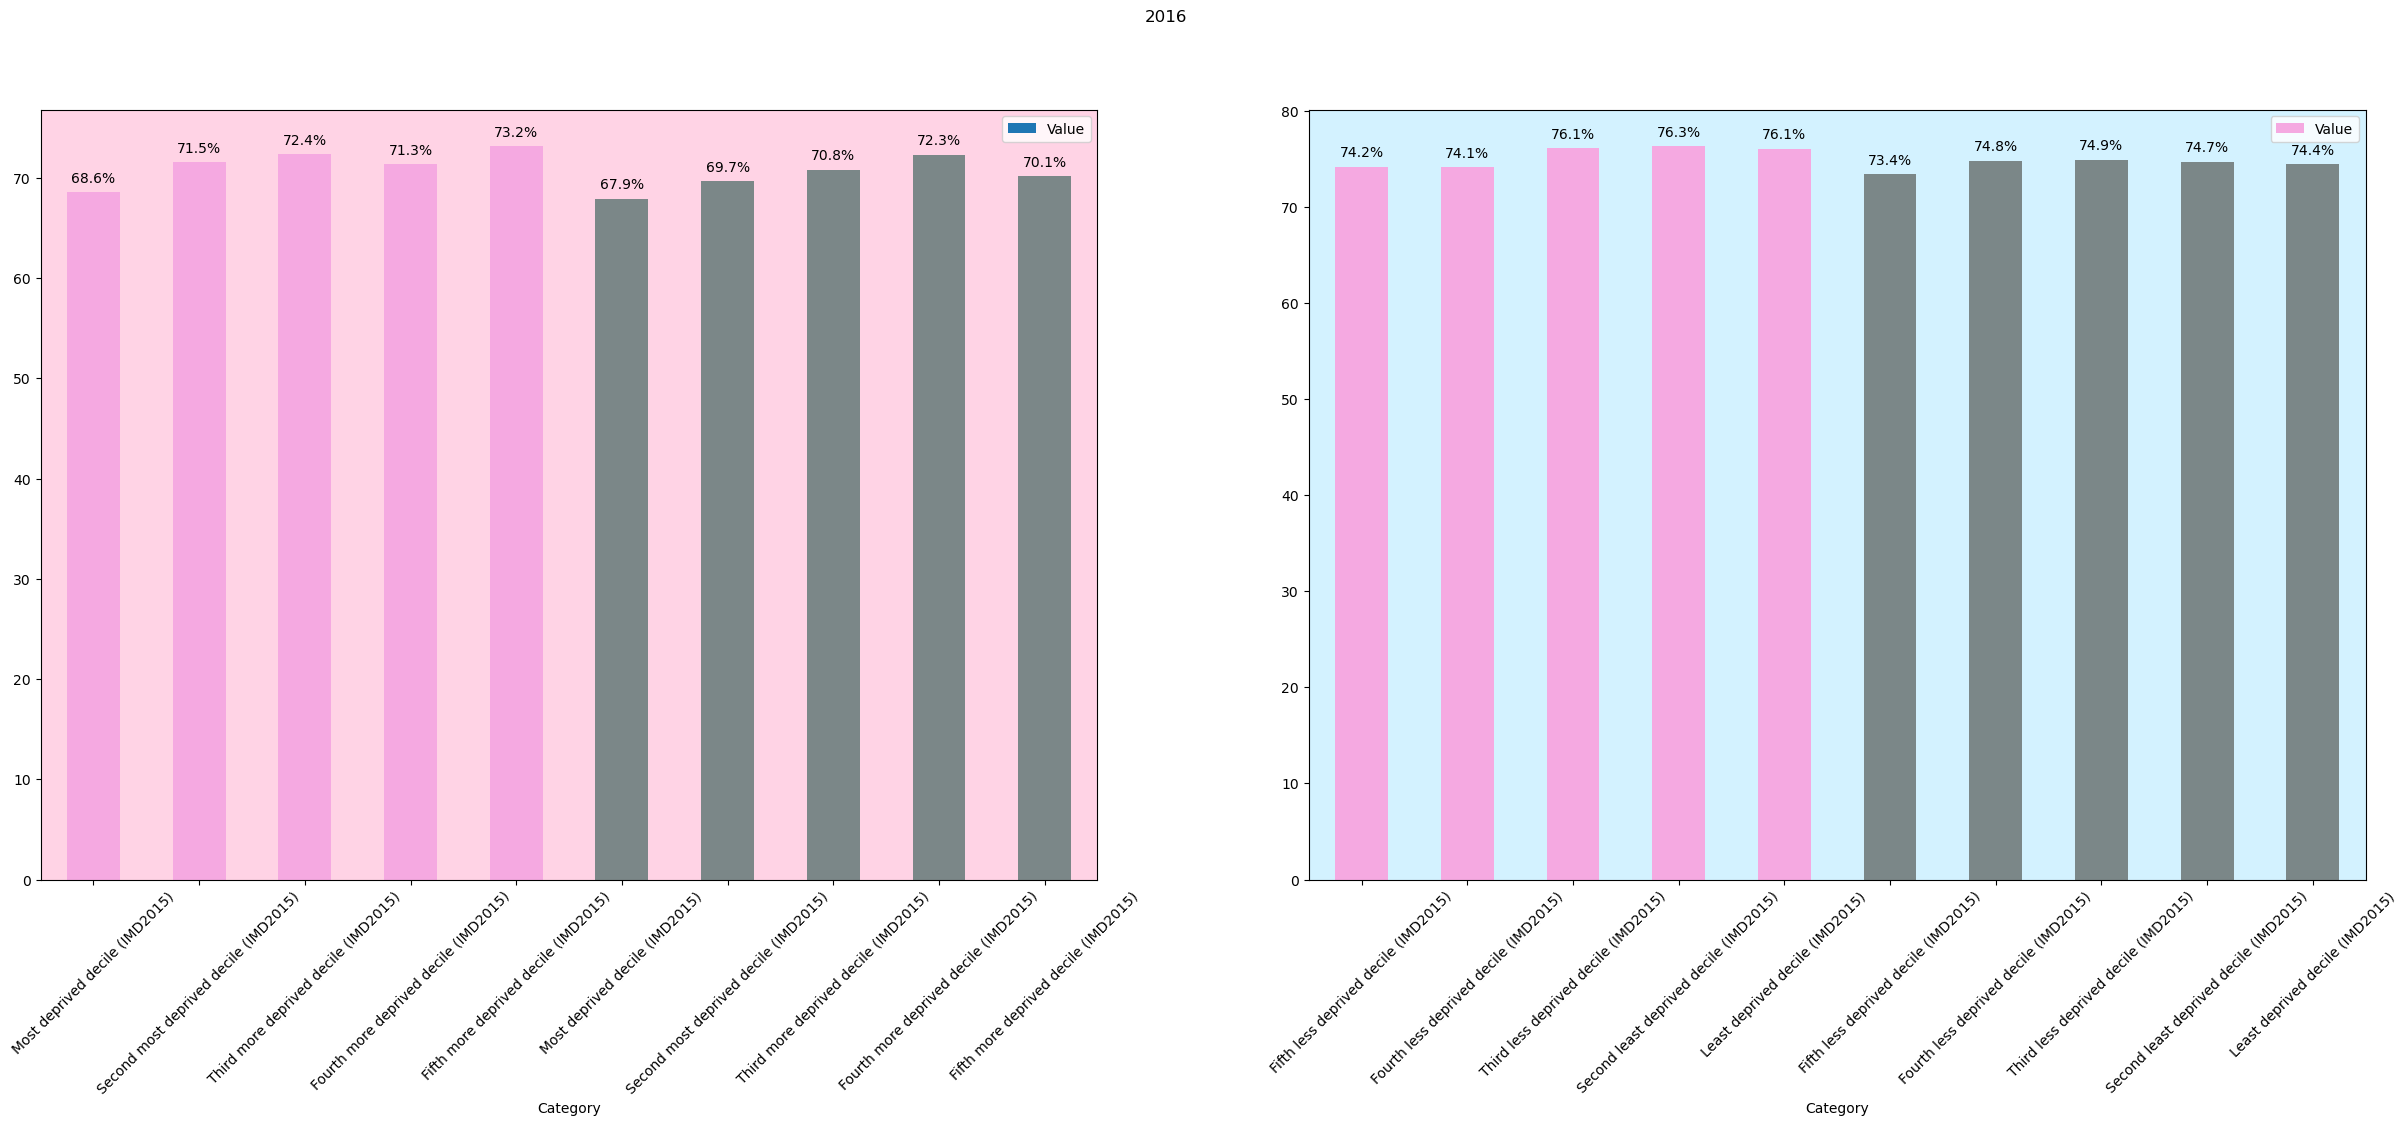

In [3]:
depriv = DeprivationPlots(df)
depriv.most_least_plot()

#### Animated Rank Based Graph

The animated rank-based graph will provide a different perspective on the data. This graph will rank the uptake levels of the screening in specified areas across the country and show how they change over time. This will allow us to see how the uptake of the screening varies over time and make comparisons between different areas.

In [ ]:
# View a list of all regions included in the Rank-based graph
Rank_Based_Graph(df).list_areas(area_type="Region")

In [ ]:
Rank_Based_Graph(df).plot_full_animated_graph(area_type='Region')

In [ ]:
# Code currently broken

Rank_Based_Graph(df).animated_bars(area_type="LA", list_reg=['New Forest', 'Three Rivers', 'Woking'])

In [ ]:

Rank_Based_Graph(df).animated_scatter()

#### Country-wide Analysis LinePlot

Finally, our country-wide analysis plot will provide an overview on England's performance as a whole in screening uptake programmes. There is also support to fetch the years with the highest and lowest values of uptake.

In [ ]:
country_analysis = Country_Analysis()

In [ ]:
# Support to fetch the year with the highest value
country_analysis.get_year_with_highest_val()

In [ ]:
# Support to fetch the year with the lowest value
country_analysis.get_year_with_lowest_val()